In [ ]:
!unzip '/content/drive/MyDrive/Проекты ML/beeVSwasp_classification/beeVSwasp.zip' -d 'beeVSwasp'

Archive:  /content/drive/MyDrive/Проекты ML/beeVSwasp_classification/beeVSwasp.zip
   creating: beeVSwasp/wasp/
  inflating: beeVSwasp/wasp/10005022206_14b5459e50_n.jpg  
  inflating: beeVSwasp/wasp/10011798473_f0d6302801_n.jpg  
  inflating: beeVSwasp/wasp/10060338395_bac28dcb97_n.jpg  
  inflating: beeVSwasp/wasp/10083655456_9bb2435c8b_n.jpg  
  inflating: beeVSwasp/wasp/10128572893_f064d53269_w.jpg  
  inflating: beeVSwasp/wasp/10129237686_a23378f50e_w.jpg  
  inflating: beeVSwasp/wasp/10129289583_e8c4617d0f_n.jpg  
  inflating: beeVSwasp/wasp/10129322803_992fe79b7a_w.jpg  
  inflating: beeVSwasp/wasp/10137536923_34b66bb37d_w.jpg  
  inflating: beeVSwasp/wasp/10197944_f5b996b422_m.jpg  
  inflating: beeVSwasp/wasp/102033121_981cb32795_n.jpg  
  inflating: beeVSwasp/wasp/1027007456_6a89f7372a_n.jpg  
  inflating: beeVSwasp/wasp/1032128732_50dade4f6f_n.jpg  
  inflating: beeVSwasp/wasp/10410963023_8f6f7374c9_n.jpg  
  inflating: beeVSwasp/wasp/104419135_5e6f855137_n.jpg  
  inflating:

In [ ]:
from tensorflow.nn import max_pool2d, conv2d, relu, sigmoid, softmax, dropout, leaky_relu
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
import tensorflow as tf

from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from time import time
import sys

In [ ]:
start = time()
path = '/content/beeVSwasp'
bee = []
wasp = []
for folder in os.listdir(path):
  path_folder = os.path.join(path, folder)
  for image_name in os.listdir(path_folder):
    image = Image.open(os.path.join(path_folder, image_name))
    image = image.convert('RGB')
    image = image.resize((128, 128))
    image = np.array(image)
    
    if folder == 'bee':
      bee.append(image)
    else:
      wasp.append(image)
      

bee = np.array(bee)
wasp = np.array(wasp)

x_train = np.concatenate((bee[:round(len(bee) * 0.7)], wasp[:round(len(wasp) * 0.7)]))
y_train = np.concatenate((np.zeros(round(len(bee) * 0.7)), np.ones(round(len(wasp) * 0.7))))
x_test = np.concatenate((bee[round(len(bee) * 0.7):], wasp[round(len(wasp) * 0.7):]))
y_test = np.concatenate((np.zeros(len(bee[round(len(bee) * 0.7):])), np.ones(len(wasp[round(len(wasp) * 0.7):]))))
print(time() - start)

10.996873617172241


In [ ]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [ ]:
x_train, y_train = shuffle_in_unison(x_train, y_train)
x_test, y_test = shuffle_in_unison(x_test, y_test)

In [ ]:
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [ ]:
print(bee.shape, wasp.shape)

(2469, 128, 128, 3) (2127, 128, 128, 3)


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3217, 128, 128, 3) (3217, 2)
(1379, 128, 128, 3) (1379, 2)


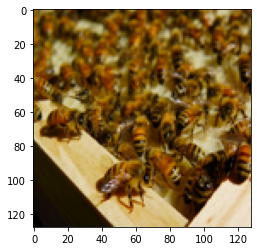

In [ ]:
plt.imshow(x_train[0])

In [ ]:
output_classes = 2 
initializer = tf.initializers.glorot_uniform()
def get_weight(shape, name):
    return tf.Variable(initializer(shape) , name=name , trainable=True , dtype=tf.float32 )

shapes = [
    [5, 5, 3, 16], 
    [5, 5, 16, 32], 
    [3, 3, 32, 64], 
    [3, 3, 64, 128],
    [8192, 512], 
    [512],
    [512, output_classes],
    [output_classes]]

#Создание весов 
weights = []
for i in range(len(shapes)):
    weights.append( get_weight(shapes[i] , 'weight{}'.format( i )))

In [ ]:
def dense(inputs , weights):
  x = inputs @ weights[0] + weights[1]
  return x

In [ ]:
initializer = tf.initializers.glorot_uniform()
def model(x):
  x = x / 255
  x = conv2d(x, weights[0], strides=1 , padding='SAME')
  x = relu(x)
  x = max_pool2d(x, ksize=[1, 2, 2 ,1], padding='VALID', strides=[1, 2, 2 ,1])
  x = conv2d(x, weights[1], strides=1 , padding='SAME')
  x = relu(x)
  x = max_pool2d(x, ksize=[1, 2, 2 ,1], padding='VALID', strides=[1, 2, 2 ,1])
  x = conv2d(x, weights[2], strides=1 , padding='SAME')
  x = relu(x)
  x = max_pool2d(x, ksize=[1, 2, 2 ,1], padding='VALID', strides=[1, 2, 2 ,1])
  x = conv2d(x, weights[3], strides=1 , padding='SAME')
  x = relu(x)
  x = max_pool2d(x, ksize=[1, 2, 2 ,1], padding='VALID', strides=[1, 2, 2 ,1])
  x = tf.reshape(x , shape=(tf.shape(x)[0], -1))
  x = dense(x, weights[4:6])
  x = relu(x)
  x = dense(x, weights[6:])
  return softmax(x)

In [ ]:
optimizer = tf.optimizers.Adam(5e-4)
def train(model, inputs , outputs):
    m = tf.keras.metrics.Accuracy()
    with tf.GradientTape() as tape:
        current_loss = categorical_crossentropy(model(inputs), outputs)
        
        grads = tape.gradient(current_loss , weights)
        
        optimizer.apply_gradients(zip(grads , weights))
        
        _ = m.update_state(np.argmax(outputs, axis=1), np.argmax(model(inputs), axis=1))
    return tf.reduce_mean(current_loss) , m.result().numpy()

In [ ]:
def print_log(current, amount, params):
  
  bar_len = 30 
  percent = int(current * bar_len / amount) 
  progressbar = ''

  for i in range(bar_len):
    if(i < percent):
      progressbar += '='
    elif(i == percent):
      progressbar += '>'
    else:
      progressbar += '-'

  message = "\r" + str(current) + '/' + str(amount) + ' [' + progressbar + ']  ' 
  
  for key in params:
    message += key + str(params[key]) + '. '
  
  sys.stdout.write(message)
  sys.stdout.flush()

In [ ]:
current_time = time
loss_log_dir = '/data'
loss_summary_writer = tf.summary.create_file_writer(loss_log_dir)

batchSize = 100
epochs = 20
amount_bathces = int(len(x_train) / batchSize)

for epoch in range(1, epochs + 1):
  learningEpochStartTime = time() 
  print('Эпоха', epoch, '/', epochs)
  avg_loss = 0
  for batch in range(0, len(x_train), batchSize):
    current_loss, accuracy = train(model, x_train[batch:batch + batchSize], y_train[batch:batch + batchSize])
    avg_loss += current_loss

    params = {'Длительность обучения на эпохе: ': round(time() - learningEpochStartTime, 2),
              'loss: ': current_loss.numpy(),
              'accuracy: ': accuracy}
    if(batch >= len(x_train) - batchSize):
      params['loss: '] = (avg_loss / amount_bathces).numpy()
    current_batch = int(batch / batchSize) + 1
    print_log(current_batch, amount_bathces, params)
    tf.summary.scalar("avg_loss", avg_loss, step=epoch)
    tf.summary.scalar("accuracy", accuracy, step=epoch)
    loss_summary_writer.flush()
  print()


Эпоха 1 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.46. loss: 3.1738489. accuracy: 0.7058824. 
Эпоха 2 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.37. loss: 2.7779248. accuracy: 0.7647059. 
Эпоха 3 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.36. loss: 2.5030582. accuracy: 0.9411765. 
Эпоха 4 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.4. loss: 3.9736092. accuracy: 0.8235294. 
Эпоха 5 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.41. loss: 2.7467282. accuracy: 0.7647059. 
Эпоха 6 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.4. loss: 2.578196. accuracy: 0.7647059. 
Эпоха 7 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.37. loss: 2.5027432. accuracy: 0.7647059. 
Эпоха 8 / 20
33/32 [==============================]  Длительность обучения на эпохе: 3.37. lo

In [ ]:
predict = model(x_test)
print(accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1)))

0.8208846990572879


**Вывод**: Впервые в жизни работаю напрямую с TensorFlow. Точность не большая, можно было бы по попробовать сделать предобработку изображений, например перевести в черно-белый формат или сделать аугментацию, dropout(я пытался сделать, но не вышло). Бинарная классификация с сигмоидой и бинарной кроссэнтропией работает хуже.

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
                    Conv2D(16, 5, padding='same', activation='relu', input_shape=(128, 128, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(32, 5, padding='same', activation='relu', input_shape=(128, 128, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(64, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(128, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
                    MaxPool2D((2, 2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(2, activation='softmax')
])

model.compile(
    optimizer=Adam(5e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=10, epochs=20)
model.evaluate(x_test, y_test)

Epoch 1/20
322/322 [==============================] - 33s 9ms/step - loss: 4.7452 - accuracy: 0.6325
Epoch 2/20
322/322 [==============================] - 3s 9ms/step - loss: 0.5030 - accuracy: 0.7660
Epoch 3/20
322/322 [==============================] - 3s 9ms/step - loss: 0.4861 - accuracy: 0.7695
Epoch 4/20
322/322 [==============================] - 3s 9ms/step - loss: 0.3992 - accuracy: 0.8243
Epoch 5/20
322/322 [==============================] - 3s 9ms/step - loss: 0.3994 - accuracy: 0.8226
Epoch 6/20
322/322 [==============================] - 3s 9ms/step - loss: 0.3142 - accuracy: 0.8646
Epoch 7/20
322/322 [==============================] - 3s 9ms/step - loss: 0.2825 - accuracy: 0.8761
Epoch 8/20
322/322 [==============================] - 3s 9ms/step - loss: 0.2521 - accuracy: 0.9003
Epoch 9/20
322/322 [==============================] - 3s 9ms/step - loss: 0.2031 - accuracy: 0.9170
Epoch 10/20
322/322 [==============================] - 3s 9ms/step - loss: 0.1459 - accuracy: 0.936

[1.0701465606689453, 0.7802755832672119]